In [3]:
import cvxpy as cp
import numpy as np
from scipy.interpolate import BSpline, make_lsq_spline

# Define your basis splines and points
# Set up your design matrix for B(x), B''(x)
# Define coefficients c as cvxpy variable
c = cp.Variable(num_basis)

# Build loss term
loss = cp.sum_squares(A @ c - y)

# Build constraints on second derivative
constraints = [A2_neg @ c >= 0,   # For x < 0
               A2_pos @ c <= 0]   # For x > 0

# Solve
cp.Problem(cp.Minimize(loss), constraints).solve()

NameError: name 'num_basis' is not defined

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import os

os.chdir("/home/gadus/programing-projects/julia-projects/ThreeStageModel/")
df =( pd.read_csv("test.csv")[0:300]).sort_values("X")

In [119]:
df

,X,Y
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
295,296,1.0
296,297,1.0
297,298,1.0
298,299,1.0


In [120]:
import numpy as np
import cvxpy as cp
from scipy.interpolate import BSpline, make_lsq_spline
from scipy.interpolate import splev, splrep

# Your data
x = df.X.to_numpy() - 150.5
y = df.Y.to_numpy()

# 1. Choose knots and basis
knots = np.linspace(min(x), max(x), 50)
degree = 3
t = np.concatenate(([knots[0]]*degree, knots, [knots[-1]]*degree))  # knot vector
n_basis = len(t) - degree - 1

basis_funcs = [BSpline.basis_element(t[i:i+degree+2]) for i in range(n_basis)]



In [121]:

def eval_basis(x_points, deriv=0):
    return np.vstack([
        [b(xi, nu=deriv) for b in basis_funcs] for xi in x_points
    ])

A = eval_basis(x, 0)            # Fit to data
A_d = eval_basis(x, 1) 
A_dd_neg = eval_basis(x[x < 0], 2)    # Second derivative for x < 0
A_dd_pos = eval_basis(x[x > 0], 2)    # Second derivative for x > 0

# 3. Define optimization
c = cp.Variable(n_basis)
loss = cp.sum_squares(A @ c - y)
constraints = [A_dd_neg @ c >= 0, A_dd_pos @ c <= 0]
prob = cp.Problem(cp.Minimize(loss), constraints)
prob.solve(verbose = True)

# 4. Evaluate fitted spline
fitted_y = A @ c.value

                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) Apr 20 05:56:46 PM: Your problem has 52 variables, 300 constraints, and 0 parameters.
(CVXPY) Apr 20 05:56:46 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 20 05:56:46 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 20 05:56:46 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Apr 20 05:56:46 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 20 05:56:46 PM: Compiling problem (target solver=OSQP).
(C

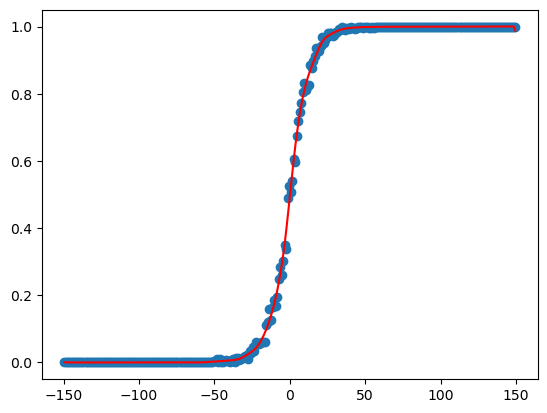

In [123]:
plt.scatter(x,y)
plt.plot(x,fitted_y, color = "r")


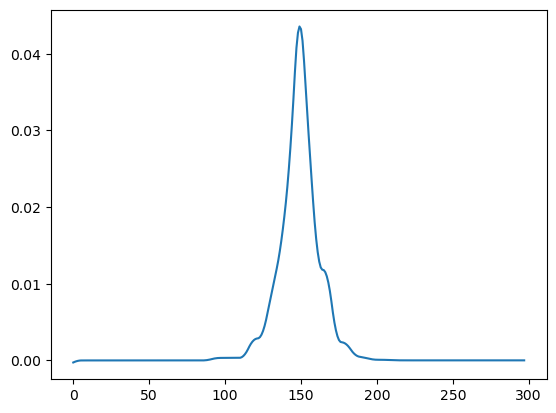

In [127]:
plt.plot(fitted_y[1:-1] - fitted_y[0:-2])

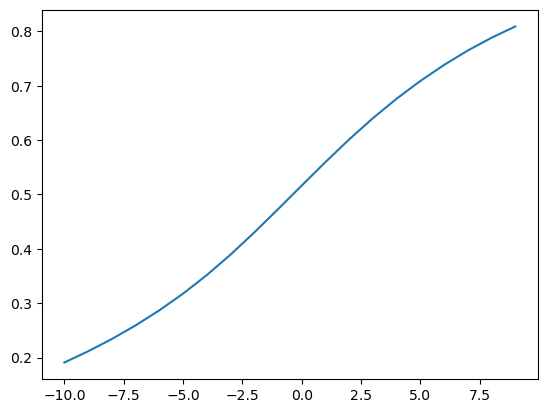

In [124]:
plt.plot(range(-10,10),fitted_y[140:160])

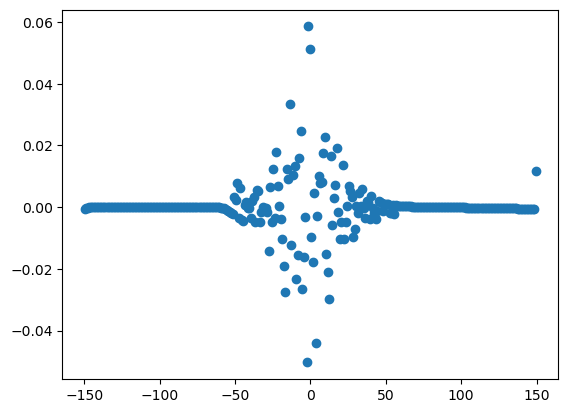

In [125]:
plt.scatter(x, y - fitted_y)

array([ 6.26657997e-04,  6.26657997e-04,  6.26657997e-04,  3.41445892e-04,
        3.41445892e-04,  3.41445892e-04,  1.49050788e-04,  1.49050788e-04,
        1.49050788e-04,  3.12803008e-05,  3.12803008e-05,  3.12803008e-05,
       -3.00579527e-05, -3.00579527e-05, -3.00579527e-05, -5.31563564e-05,
       -5.31563564e-05, -5.31563564e-05, -5.62072942e-05, -5.62072942e-05,
       -5.62072942e-05, -5.52077684e-05, -5.52077684e-05, -5.52077684e-05,
       -5.42062289e-05, -5.42062289e-05, -5.42062289e-05, -5.32058151e-05,
       -5.32058151e-05, -5.32058151e-05, -5.22064427e-05, -5.22064427e-05,
       -5.22064427e-05, -5.12080273e-05, -5.12080273e-05, -5.12080273e-05,
       -5.02104850e-05, -5.02104850e-05, -5.02104850e-05, -4.92137452e-05,
       -4.92137452e-05, -4.92137452e-05, -4.82178245e-05, -4.82178245e-05,
       -4.82178245e-05, -4.72227823e-05, -4.72227823e-05, -4.72227823e-05,
       -4.62286757e-05, -4.62286757e-05, -4.62286757e-05, -4.52355642e-05,
       -4.52355642e-05, -

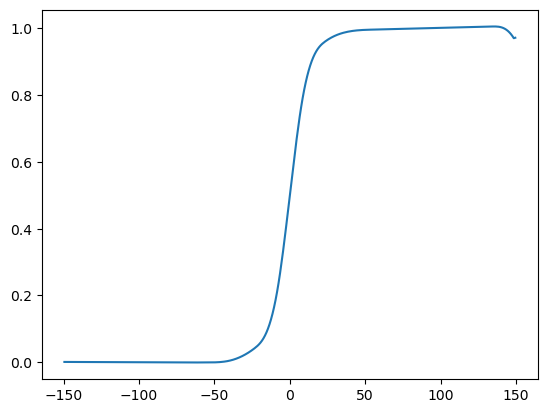

In [51]:
plt.plot(x,fitted_y)

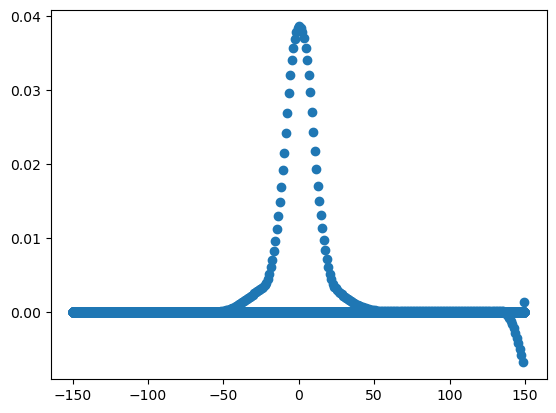

In [45]:
plt.scatter(x[1:-1],fitted_y[1:-1]- fitted_y[0:-2])

In [15]:
np.vstack([[b(xi, nu=0) for b in basis_funcs] for xi in x])

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.21833333e+02, -4.32000000e+02, -2.19700000e+03],
       [ 8.66006227e-01,  1.30782208e-01,  3.19445548e-03, ...,
        -2.19012598e+02, -4.26962849e+02, -2.17334627e+03],
       [ 7.44550754e-01,  2.42910947e-01,  1.24014285e-02, ...,
        -2.16215877e+02, -4.21965008e+02, -2.14986293e+03],
       ...,
       [-2.14986293e+03, -4.21965008e+02, -2.16215877e+02, ...,
         1.24014285e-02,  2.42910947e-01,  7.44550754e-01],
       [-2.17334627e+03, -4.26962849e+02, -2.19012598e+02, ...,
         3.19445548e-03,  1.30782208e-01,  8.66006227e-01],
       [-2.19700000e+03, -4.32000000e+02, -2.21833333e+02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])